In [1]:
# データのロード
# TODO ここをOCIに書き換えたい
from sklearn import datasets
iris = datasets.load_iris()


In [2]:
# データの確認
print(iris.target_names)

['setosa' 'versicolor' 'virginica']

In [3]:
# MLlibを使ってみる(K-means)
from pyspark.mllib import clustering

k=3

# spark用にデータ変換
sp_data = sc.parallelize(iris.data[:,[0,2]])
# 実行
k_model = clustering.KMeans.train(sp_data, k, initializationMode="random", seed=None)

In [4]:
# 結果表示1
print("Final centers: " + str(k_model.clusterCenters))
print("Total Cost: " + str(k_model.computeCost(sp_data)))

Final centers: [array([ 5.00784314, 1.49411765]), array([ 5.87413793, 4.39310345]), array([ 6.83902439, 5.67804878])]
Total Cost: 53.80135119312719

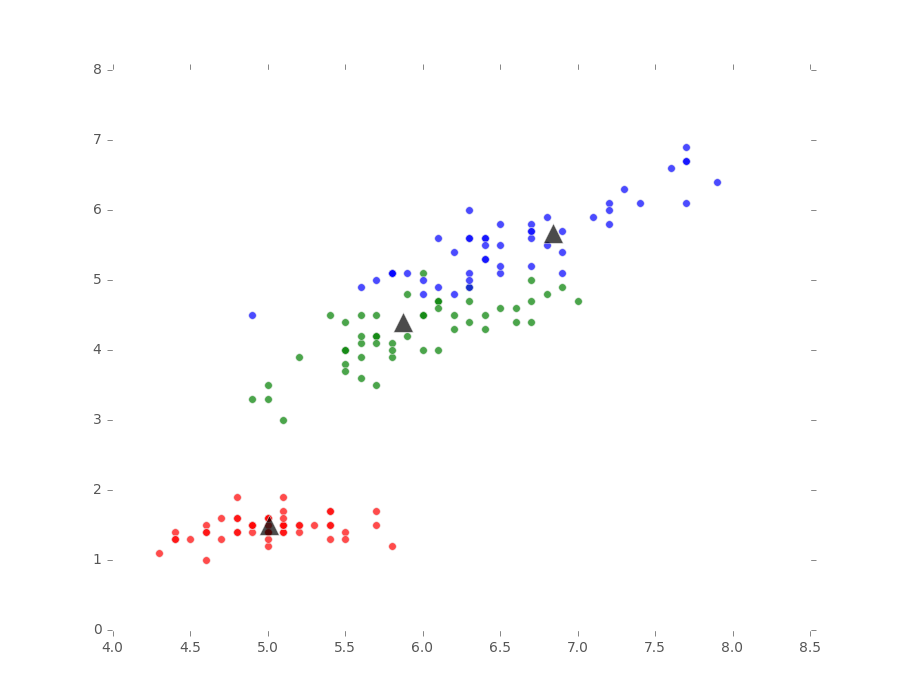

In [5]:
# 結果表示2
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

plt.figure(figsize=(9,7))

# データ位置のプロット(カテゴリ別に色分け)
for i, color in enumerate('rgb'):
    idx = np.where(iris.target == i)[0]
    plt.scatter(iris.data[idx,0],iris.data[idx,2], c=color, s=30, alpha=.7)

# モデルで取得した各分類のセンターを▲で表示
for i in range(k):
    plt.scatter(k_model.clusterCenters[i][0], k_model.clusterCenters[i][1], s=200, c='black', alpha=.7, marker='^', zorder=100)
    
display(plt.show())
